In [1]:
# load a cvs file
import numpy as np

# tv, radio, newspaper, sales
data = np.genfromtxt('advertising.csv', delimiter=',').tolist()
print(data[:5])

[[nan, nan, nan, nan], [230.1, 37.8, 69.2, 22.1], [44.5, 39.3, 45.1, 10.4], [17.2, 45.9, 69.3, 12.0], [151.5, 41.3, 58.5, 16.5]]


In [2]:
# load a cvs file
import numpy as np

data = np.genfromtxt('advertising.csv', delimiter=',', skip_header=1).tolist()
print(data[:5])

[[230.1, 37.8, 69.2, 22.1], [44.5, 39.3, 45.1, 10.4], [17.2, 45.9, 69.3, 12.0], [151.5, 41.3, 58.5, 16.5], [180.8, 10.8, 58.4, 17.9]]


#### implementation

In [3]:
# dataset
import numpy as np
import matplotlib.pyplot as plt
import random

def get_column(data, index):
    result = [row[index] for row in data]
    return result

data = np.genfromtxt('advertising.csv', delimiter=',', skip_header=1).tolist()
N = len(data)

# get tv (index=0)
tv_data = get_column(data, 0)
print(tv_data[:5])

# get radio (index=1)
radio_data = get_column(data, 1)
print(radio_data[:5])

# get newspaper (index=2)
newspaper_data = get_column(data, 2)
print(newspaper_data[:5])

# get sales (index=0)
sales_data = get_column(data, 3)
print(sales_data[:5])

[230.1, 44.5, 17.2, 151.5, 180.8]
[37.8, 39.3, 45.9, 41.3, 10.8]
[69.2, 45.1, 69.3, 58.5, 58.4]
[22.1, 10.4, 12.0, 16.5, 17.9]


In [4]:
# compute output and loss
def predict(x1, x2, x3, w1, w2, w3, b):
    return w1*x1 + w2*x2 + w3*x3 + b
def compute_loss(y_hat, y):
    return (y_hat - y)**2

# compute gradient
def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2*xi*(y_hat-y)
    return dl_dwi 
def compute_gradient_b(y, y_hat):
    dl_db = 2*(y_hat-y)
    return dl_db

# update weights
def update_weight_wi(wi, dl_dwi, lr):
    wi = wi - lr*dl_dwi
    return wi    
def update_weight_b(b, dl_db, lr):    
    b  = b - lr*dl_db    
    return b

In [5]:
def initialize_params():
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    b  = 0
    
    return w1, w2, w3, b

# initialize model's parameters
w1, w2, w3, b = initialize_params()
print(w1, w2, w3, b)

-0.008698351946278859 -0.005743277253782298 -0.004586698090394985 0


In [6]:
epoch_max = 50
lr = 1e-5
losses = []

for epoch in range(epoch_max):
    for i in range(N):
        # get a sample
        x1 = tv_data[i]
        x2 = radio_data[i]
        x3 = newspaper_data[i]
        y  = sales_data[i]
        
        # compute output 
        y_hat = predict(x1, x2, x3, w1, w2, w3, b)
        
        # compute loss
        loss = compute_loss(y, y_hat)

        # compute gradient w1, w2, w3, b
        dl_dw1 = compute_gradient_wi(x1, y, y_hat)
        dl_dw2 = compute_gradient_wi(x2, y, y_hat)
        dl_dw3 = compute_gradient_wi(x3, y, y_hat)
        dl_db  = compute_gradient_b(y, y_hat)


        # update parameters
        w1 = update_weight_wi(w1, dl_dw1, lr)
        w2 = update_weight_wi(w2, dl_dw2, lr)
        w3 = update_weight_wi(w3, dl_dw3, lr)
        b  = update_weight_b(b, dl_db, lr)

        # logging
        losses.append(loss) 

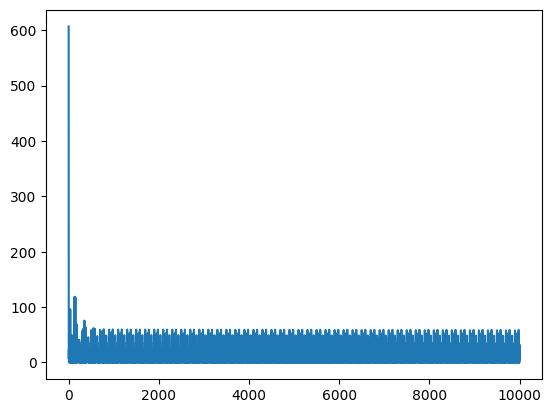

In [7]:
plt.plot(losses)
plt.show()

#### Inference

In [9]:
# get model's parameters
print(w1, w2, w3, b)

0.0740591713478774 0.15917187763303095 0.01756042159747709 0.13940105786909532


In [10]:
def predict(x1, x2, x3, w1, w2, w3, b):
    return w1*x1 + w2*x2 + w3*x3 + b

# given new data
tv = 19.2
radio = 35.9 
newspaper = 51.3

sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 8.176457182724727


In [11]:
# [230.1, 37.8, 69.2, 22.1]

tv = 230.1
radio = 37.8 
newspaper = 69.2

sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 24.412294534089668
